<a href="https://colab.research.google.com/github/GanesH2O/Downscale-GRACE/blob/main/05_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rioxarray
!pip install netCDF4
!pip install cartopy
!pip install pymannkendall

In [ ]:
import xarray as xr
import pandas as pd
import rioxarray as rio
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pymannkendall as mk
import geopandas as gpd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pymannkendall import sens_slope
import numpy as np
import seaborn as sns

In [ ]:
nepal_shp = gpd.read_file('/content/drive/MyDrive/Paperwork/SHP/AOI.shp')
nepal_shp = nepal_shp.set_crs('epsg:4326')
world_shp = gpd.read_file('/content/drive/MyDrive/Paperwork/SHP/world-administrative-boundaries.shp')
world_shp = world_shp.set_crs('epsg:4326')

In [ ]:
GWSA = xr.open_dataset('/content/drive/MyDrive/Paperwork/RESULTS/G3S_GWSA.nc')
GWSA = GWSA.rio.write_crs('epsg:4326')
GWSA = GWSA.rio.clip(nepal_shp.geometry,all_touched=True)
GWSA = GWSA.sel(time=slice('2003-01-01','2016-12-31'))
GWSA = GWSA.rename({'GWS_CR': 'GWSA'})
GWSA

<xarray.Dataset> Size: 7MB
Dimensions:      (time: 168, x: 111, y: 48)
Coordinates:
  * time         (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * x            (x) float64 888B 77.45 77.55 77.65 77.75 ... 88.25 88.35 88.45
  * y            (y) float64 384B 24.45 24.55 24.65 24.75 ... 28.95 29.05 29.15
    spatial_ref  int64 8B 0
Data variables:
    GWSA         (time, y, x) float64 7MB nan nan nan nan ... nan nan nan nan

In [ ]:
GWSA = xr.open_dataset('/content/drive/MyDrive/Paperwork/DATA/G3S_gwsa_full.nc')
GWSA = GWSA.rio.write_crs('epsg:4326')
GWSA = GWSA.rio.clip(nepal_shp.geometry,all_touched=True)
GWSA = GWSA.sel(time=slice('2003-01-01','2016-12-31'))
GWSA = GWSA.rename({'gwsa': 'GWSA'})
GWSA

<xarray.Dataset> Size: 682kB
Dimensions:      (time: 168, x: 23, y: 11)
Coordinates:
  * time         (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * x            (x) float32 92B 77.25 77.75 78.25 78.75 ... 87.25 87.75 88.25
  * y            (y) float32 44B 24.25 24.75 25.25 25.75 ... 28.25 28.75 29.25
    spatial_ref  int64 8B 0
Data variables:
    GWSA         (time, y, x) float64 340kB nan nan nan nan ... nan nan nan nan
    uncertainty  (time, y, x) float64 340kB nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.8
    source:       GWSA obtained from subtraction of observational (Gaussian) ...
    institution:  GFZ German Research Centre for Geosciences https://www.gfz-...
    title:        This product is assigned as the version V1.12 of groundwate...
    contact:      andreas.guentner@gfz-potsdam.de and ehsan.sharifi@gfz-potsd...
    funding:      This project has received funding from the European Union’s...
    version:      V1.12
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    history:      created 18/06/2024

# GWSA and Precipitation

In [ ]:
ds2 = xr.open_dataset('/content/drive/MyDrive/Paperwork/DATA/0.5/IMERG_0.5.nc')
ds2 = ds2.rio.write_crs('epsg:4326')
ds2 = ds2.rio.clip(nepal_shp.geometry,all_touched=True)
ds2 = ds2.sel(time=slice('2003-01-01','2016-12-31'))
ds2 = ds2.drop_vars('spatial_ref')
ds2

<xarray.Dataset> Size: 342kB
Dimensions:        (time: 168, x: 23, y: 11)
Coordinates:
  * time           (time) datetime64[ns] 1kB 2003-01-01 ... 2016-12-01
  * x              (x) float64 184B 77.25 77.75 78.25 ... 87.25 87.75 88.25
  * y              (y) float64 88B 24.25 24.75 25.25 25.75 ... 28.25 28.75 29.25
Data variables:
    precipitation  (time, x, y) float64 340kB nan nan nan nan ... nan nan nan
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-MONTH/07...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=7e;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-MO.MS.MRG.3IMERG.20020901-S000...
    history_L34RS:                          'Created by L34RS v1.4.4 @ NASA G...
    CDO:                                    Climate Data Operators version 1....

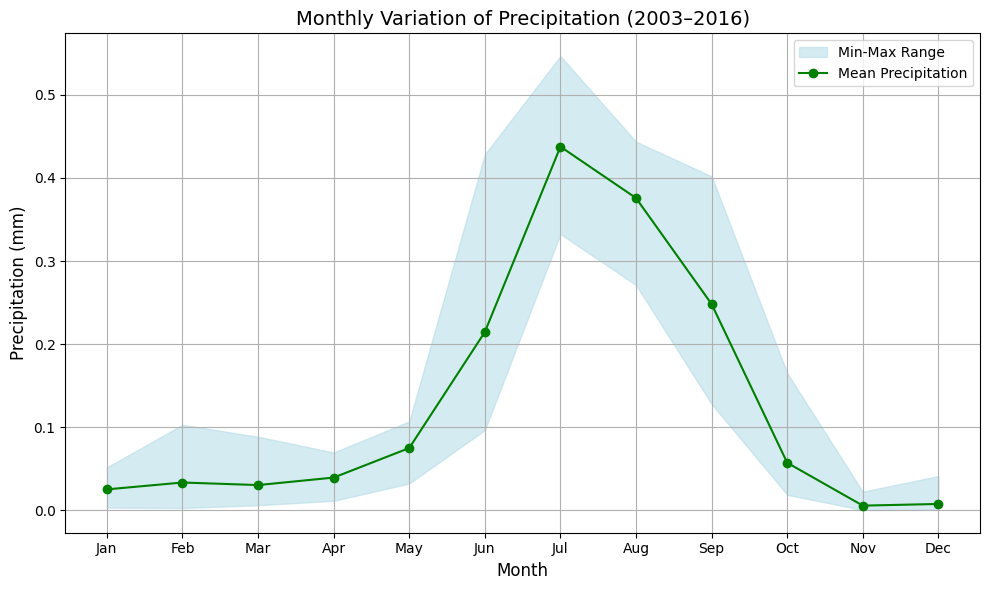

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the IMERG dataset (replace 'path/to/IMERG.nc' with your actual file path)
IMERG = xr.open_dataset('/content/drive/MyDrive/Paperwork/DATA/0.5/IMERG_0.5.nc')
precip = IMERG['precipitation']

# If precipitation is 3D (time, lat, lon), compute spatial mean
if len(precip.shape) == 3:
    precip = precip.mean(dim=('x', 'y'))

# Extract time and convert to datetime components
time = precip['time']
years = time.dt.year.values
months = time.dt.month.values

# Create a time series of precipitation
precip_time_series = precip.values

# Group by month across all years and calculate statistics
monthly_stats = []
unique_months = np.unique(months)
for month in unique_months:
    monthly_data = precip_time_series[months == month]
    if len(monthly_data) > 0:
        monthly_stats.append({
            'mean': np.nanmean(monthly_data),
            'min': np.nanmin(monthly_data),
            'max': np.nanmax(monthly_data)
        })
    else:
        monthly_stats.append({
            'mean': np.nan,
            'min': np.nan,
            'max': np.nan
        })

# Extract stats for plotting
means = [stat['mean'] for stat in monthly_stats]
min_vals = [stat['min'] for stat in monthly_stats]
max_vals = [stat['max'] for stat in monthly_stats]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the plot
plt.figure(figsize=(10, 6))
plt.fill_between(month_labels, min_vals, max_vals, color='lightblue', alpha=0.5, label='Min-Max Range')
plt.plot(month_labels, means, color='green', marker='o', linestyle='-', label='Mean Precipitation')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)  # Adjust units based on your dataset
plt.title('Monthly Variation of Precipitation (2003–2016)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

In [ ]:
# Step 1: Convert precipitation to mm/month and average spatially
spatial_dims_precip = [dim for dim in ds2.precipitation.dims if dim != 'time']
total_precip_mean = (ds2.precipitation * ds2.time.dt.days_in_month * 24).mean(dim=spatial_dims_precip)

# Step 2: Compute monthly change in GWSA and average spatially
spatial_dims_gwsa = [dim for dim in GWSA.GWSA.dims if dim != 'time']
delta_GWSA = GWSA.GWSA.diff(dim='time')
delta_GWSA_mean = delta_GWSA.mean(dim=spatial_dims_gwsa)

# Step 3: Prepare DataFrames
precip_df = pd.DataFrame({
    'month': ds2.time.dt.month.values,
    'value': total_precip_mean.values,
    'variable': 'Precipitation'
})

delta_GWSA_df = pd.DataFrame({
    'month': GWSA.time[1:].dt.month.values,
    'value': delta_GWSA_mean.values,
    'variable': 'Net Recharge'
})

# Filter for positive net recharge
net_recharge_df = delta_GWSA_df[delta_GWSA_df['value'] > 0]

# Combine DataFrames
combined_df = pd.concat([precip_df, net_recharge_df], ignore_index=True)

# Step 4: Create box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='value', hue='variable', data=combined_df)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Value (mm/month)', fontsize = 16)
#plt.title('Monthly Variation of Precipitation and Net Recharge (2003-2020)')
plt.legend(fontsize = 16)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize = 16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/monthly_variation_boxplot_Aquifer.png')
plt.close()

print("Box plot saved as 'monthly_variation_boxplot.png'")

Box plot saved as 'monthly_variation_boxplot.png'


In [ ]:
# Calculate monthly change in GWSA (delta_GWSA)
delta_GWSA = GWSA.GWSA.diff(dim='time')
spatial_dims_gwsa = [dim for dim in GWSA.GWSA.dims if dim != 'time']
delta_GWSA_mean = delta_GWSA.mean(dim=spatial_dims_gwsa)

# Calculate total precipitation, adjusting for days in month (assuming hourly data in mm/hr)
spatial_dims_precip = [dim for dim in ds2.precipitation.dims if dim != 'time']
total_precip_mean = (ds2.precipitation * ds2.time.dt.days_in_month * 24).mean(dim=spatial_dims_precip)

# Extract time index for delta_GWSA (starts at time[1:] due to diff)
time_index = GWSA.time.values[1:]

# Extract values aligned in time
precip_values = total_precip_mean.isel(time=slice(1, None)).values
delta_GWSA_values = delta_GWSA_mean.values

# Create pandas Series with datetime index
precip_series = pd.Series(precip_values, index=time_index)
delta_GWSA_series = pd.Series(delta_GWSA_values, index=time_index)

# Define maximum lag (in months)
max_lag = 6
lags = range(-max_lag, max_lag + 1)

# Compute cross-correlation for each lag
ccf_values = []
for k in lags:
    shifted_delta_GWSA = delta_GWSA_series.shift(-k)
    ccf = precip_series.corr(shifted_delta_GWSA)
    ccf_values.append(ccf)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lags, ccf_values, marker='o', linestyle='-', color='b')
plt.xlabel('Lag (months)')
plt.ylabel('Cross-Correlation (CCF)')
plt.title('Cross-Correlation between Precipitation and Net Recharge')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)

# Save the plot
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/cross_correlation_plot_Aquifer.png')
plt.close()

print("Cross-correlation plot saved as 'cross_correlation_plot.png'")

Cross-correlation plot saved as 'cross_correlation_plot.png'


# Temporal Evolution

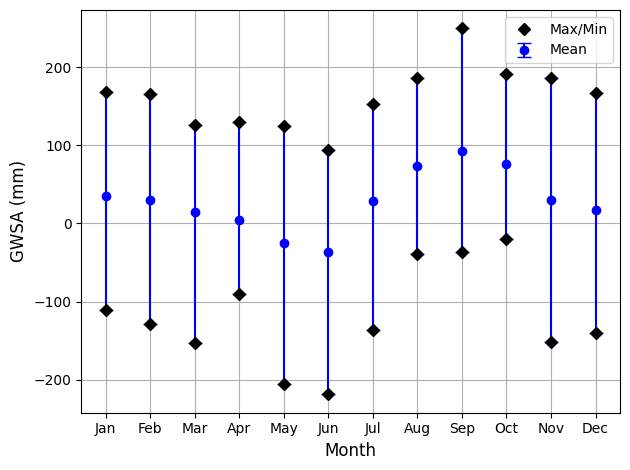

In [ ]:
# Assuming GWSA is your NetCDF dataset object
# Extract the time variable and GWSA data
time = GWSA.variables['time'][:]
gwsa = GWSA.variables['GWSA'][:]

# Assign month indices assuming monthly time steps
n_time = len(time)
months = np.arange(n_time) % 12  # Cycles through 0 to 11 for each 12 steps

# If GWSA is 3D (time, lat, lon), compute the spatial mean
if len(gwsa.shape) == 3:
    gwsa = gwsa.mean(axis=(1, 2))  # Reduce to 1D time series

# Group GWSA by month and calculate statistics
monthly_stats = []
for month in range(12):
    monthly_data = gwsa[months == month]
    if len(monthly_data) > 0:
        monthly_stats.append({
            'mean': np.mean(monthly_data),
            'max': np.max(monthly_data),
            'min': np.min(monthly_data)
        })
    else:
        monthly_stats.append({
            'mean': np.nan,
            'max': np.nan,
            'min': np.nan
        })

# Extract stats for plotting
means = [stat['mean'] for stat in monthly_stats]
max_vals = [stat['max'] for stat in monthly_stats]
min_vals = [stat['min'] for stat in monthly_stats]

# Define month labels starting from January
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the plot
plt.errorbar(months_labels, means,
             yerr=[np.array(means) - np.array(min_vals), np.array(max_vals) - np.array(means)],
             fmt='o', color='blue', capsize=5, label='Mean')
plt.plot(months_labels, max_vals, 'kD', label='Max/Min')
plt.plot(months_labels, min_vals, 'kD')
plt.xlabel('Month', fontsize=12)  # Set font size for x-label
plt.ylabel('GWSA (mm)', fontsize=12)  # Set font size for y-label
#plt.title('Intermonthly Scale Groundwater Storage Anomaly', fontsize=14)  # Set font size for title
plt.grid(True)
plt.legend(fontsize=10) # Set font size for legend
plt.tight_layout()

# Save the figure
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/Intermonthly GWSA.jpg', dpi=300, bbox_inches='tight') # Save the figure

plt.show()

Unique years found: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


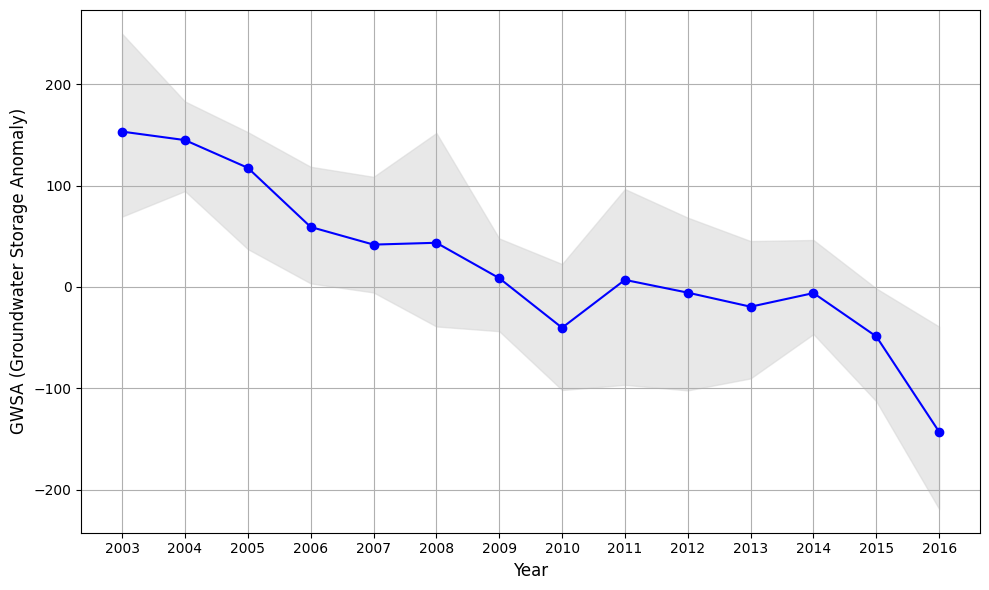

In [ ]:
# Extract the time variable and GWSA data
time = GWSA['time']
gwsa = GWSA['GWSA']


# Convert time to year values
years = time.dt.year.values

# If GWSA is 3D (time, lat, lon), compute spatial mean first
if len(gwsa.shape) == 3:
    gwsa = gwsa.mean(dim=('x', 'y'))

# Group GWSA by year and calculate stats
yearly_stats = []
unique_years = np.unique(years)
print("Unique years found:", unique_years)

for year in unique_years:
    yearly_data = gwsa.sel(time=time[time.dt.year == year]).values  # Use sel for safety
    if len(yearly_data) > 0 and not np.all(np.isnan(yearly_data)):
        yearly_stats.append({
            'mean': np.nanmean(yearly_data),
            'max': np.nanmax(yearly_data),
            'min': np.nanmin(yearly_data)
        })
    else:
        yearly_stats.append({
            'mean': np.nan,
            'max': np.nan,
            'min': np.nan
        })

# Extract stats for plotting
means = [stat['mean'] for stat in yearly_stats]
max_vals = [stat['max'] for stat in yearly_stats]
min_vals = [stat['min'] for stat in yearly_stats]
years_labels = [str(year) for year in unique_years]

# Create the plot
plt.figure(figsize=(10, 6))
plt.fill_between(years_labels, min_vals, max_vals, color='lightgray', alpha=0.5, label='Min-Max Range')
plt.plot(years_labels, means, color='blue', marker='o', linestyle='-', label='Mean GWSA')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GWSA (Groundwater Storage Anomaly)', fontsize=12)
#plt.title('Yearly Scale Groundwater Storage Anomaly', fontsize=14)
plt.grid(True)
#plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/Annual GWSA Variation.jpg', dpi=300, bbox_inches='tight') # Save the figure
plt.show()

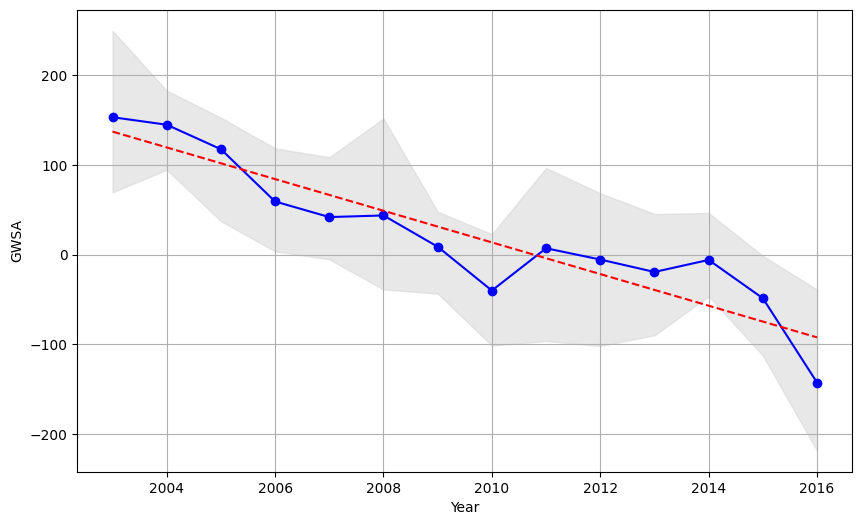

Trend slope: -17.6591
p-value: 0.0000
The trend is statistically significant at the 5% level.


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming GWSA dataset is already loaded as 'GWSA'
# Example: GWSA = xr.open_dataset('GWSA.nc')

# Extract time and GWSA variable
time = GWSA['time']
gwsa = GWSA['GWSA']

# Compute spatial mean if GWSA is gridded (3D: time, lat, lon)
if len(gwsa.shape) == 3:
    gwsa_spatial_mean = gwsa.mean(dim=['x', 'y'])
else:
    gwsa_spatial_mean = gwsa  # Assume it's already a time series

# Get unique years from the time coordinate
years = np.unique(time.dt.year.values)

# Calculate yearly mean, min, and max values
yearly_means = []
yearly_mins = []
yearly_maxs = []
for year in years:
    data = gwsa_spatial_mean.sel(time=(time.dt.year == year))
    if len(data) > 0 and not np.all(np.isnan(data)):
        yearly_means.append(data.mean().item())
        yearly_mins.append(data.min().item())
        yearly_maxs.append(data.max().item())
    else:
        yearly_means.append(np.nan)
        yearly_mins.append(np.nan)
        yearly_maxs.append(np.nan)

# Filter out years with NaN means
valid = ~np.isnan(yearly_means)
years_valid = years[valid]
means_valid = np.array(yearly_means)[valid]
mins_valid = np.array(yearly_mins)[valid]
maxs_valid = np.array(yearly_maxs)[valid]

# Perform linear regression to find the trend
slope, intercept, r_value, p_value, std_err = linregress(years_valid, means_valid)

# Create the plot
plt.figure(figsize=(10, 6))
plt.fill_between(years_valid, mins_valid, maxs_valid, color='lightgray', alpha=0.5, label='Min-Max Range')
plt.plot(years_valid, means_valid, color='blue', marker='o', linestyle='-', label='Mean GWSA')
plt.plot(years_valid, slope * years_valid + intercept, color='red', linestyle='--', label=f'Trend: slope={slope:.4f}, p={p_value:.4f}')
plt.xlabel('Year')
plt.ylabel('GWSA')
#plt.title('Yearly Basin Average GWSA with Trend')
#plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/Annual GWSA Variation.jpg', dpi=300, bbox_inches='tight') # Save the figure
plt.show()

# Print trend analysis results
print(f'Trend slope: {slope:.4f}')
print(f'p-value: {p_value:.4f}')
if p_value < 0.05:
    print('The trend is statistically significant at the 5% level.')
else:
    print('The trend is not statistically significant at the 5% level.')

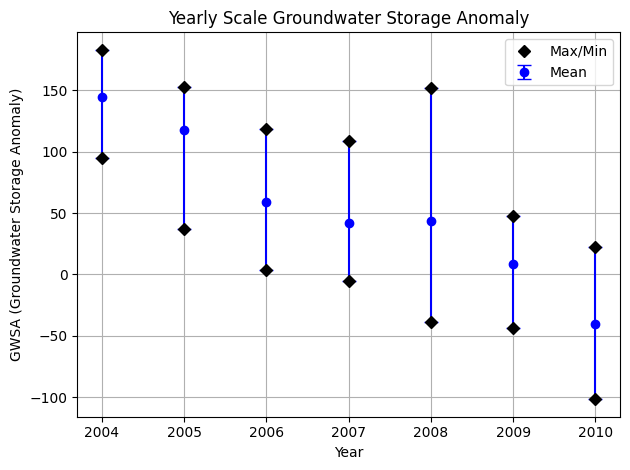

In [ ]:
# Extract the time variable and GWSA data (assuming GWSA is already loaded as a dataset object)
time = GWSA['time']
gwsa = GWSA['GWSA']

# Convert time to year values (assuming monthly data)
years = time.dt.year.values

# If GWSA is 3D (time, lat, lon), compute spatial mean first
if len(gwsa.shape) == 3:
    gwsa = gwsa.mean(dim=('x', 'y'))

# Group GWSA by year and calculate stats
yearly_stats = []
unique_years = np.unique(years)
for year in unique_years:
    yearly_data = gwsa.values[years == year]
    if len(yearly_data) > 0:
        yearly_stats.append({
            'mean': np.mean(yearly_data),
            'max': np.max(yearly_data),
            'min': np.min(yearly_data)
        })
    else:
        yearly_stats.append({
            'mean': np.nan,
            'max': np.nan,
            'min': np.nan
        })


# Extract stats for plotting
means = [stat['mean'] for stat in yearly_stats]
max_vals = [stat['max'] for stat in yearly_stats]
min_vals = [stat['min'] for stat in yearly_stats]
years_labels = [str(year) for year in unique_years]

# Create the plot
plt.errorbar(years_labels, means, yerr=[np.array(means) - np.array(min_vals), np.array(max_vals) - np.array(means)],
             fmt='o', color='blue', capsize=5, label='Mean')
plt.plot(years_labels, max_vals, 'kD', label='Max/Min')
plt.plot(years_labels, min_vals, 'kD')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GWSA (Groundwater Storage Anomaly)', fontsize=12)
plt.title('Yearly Scale Groundwater Storage Anomaly', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

# Spatial Evolution

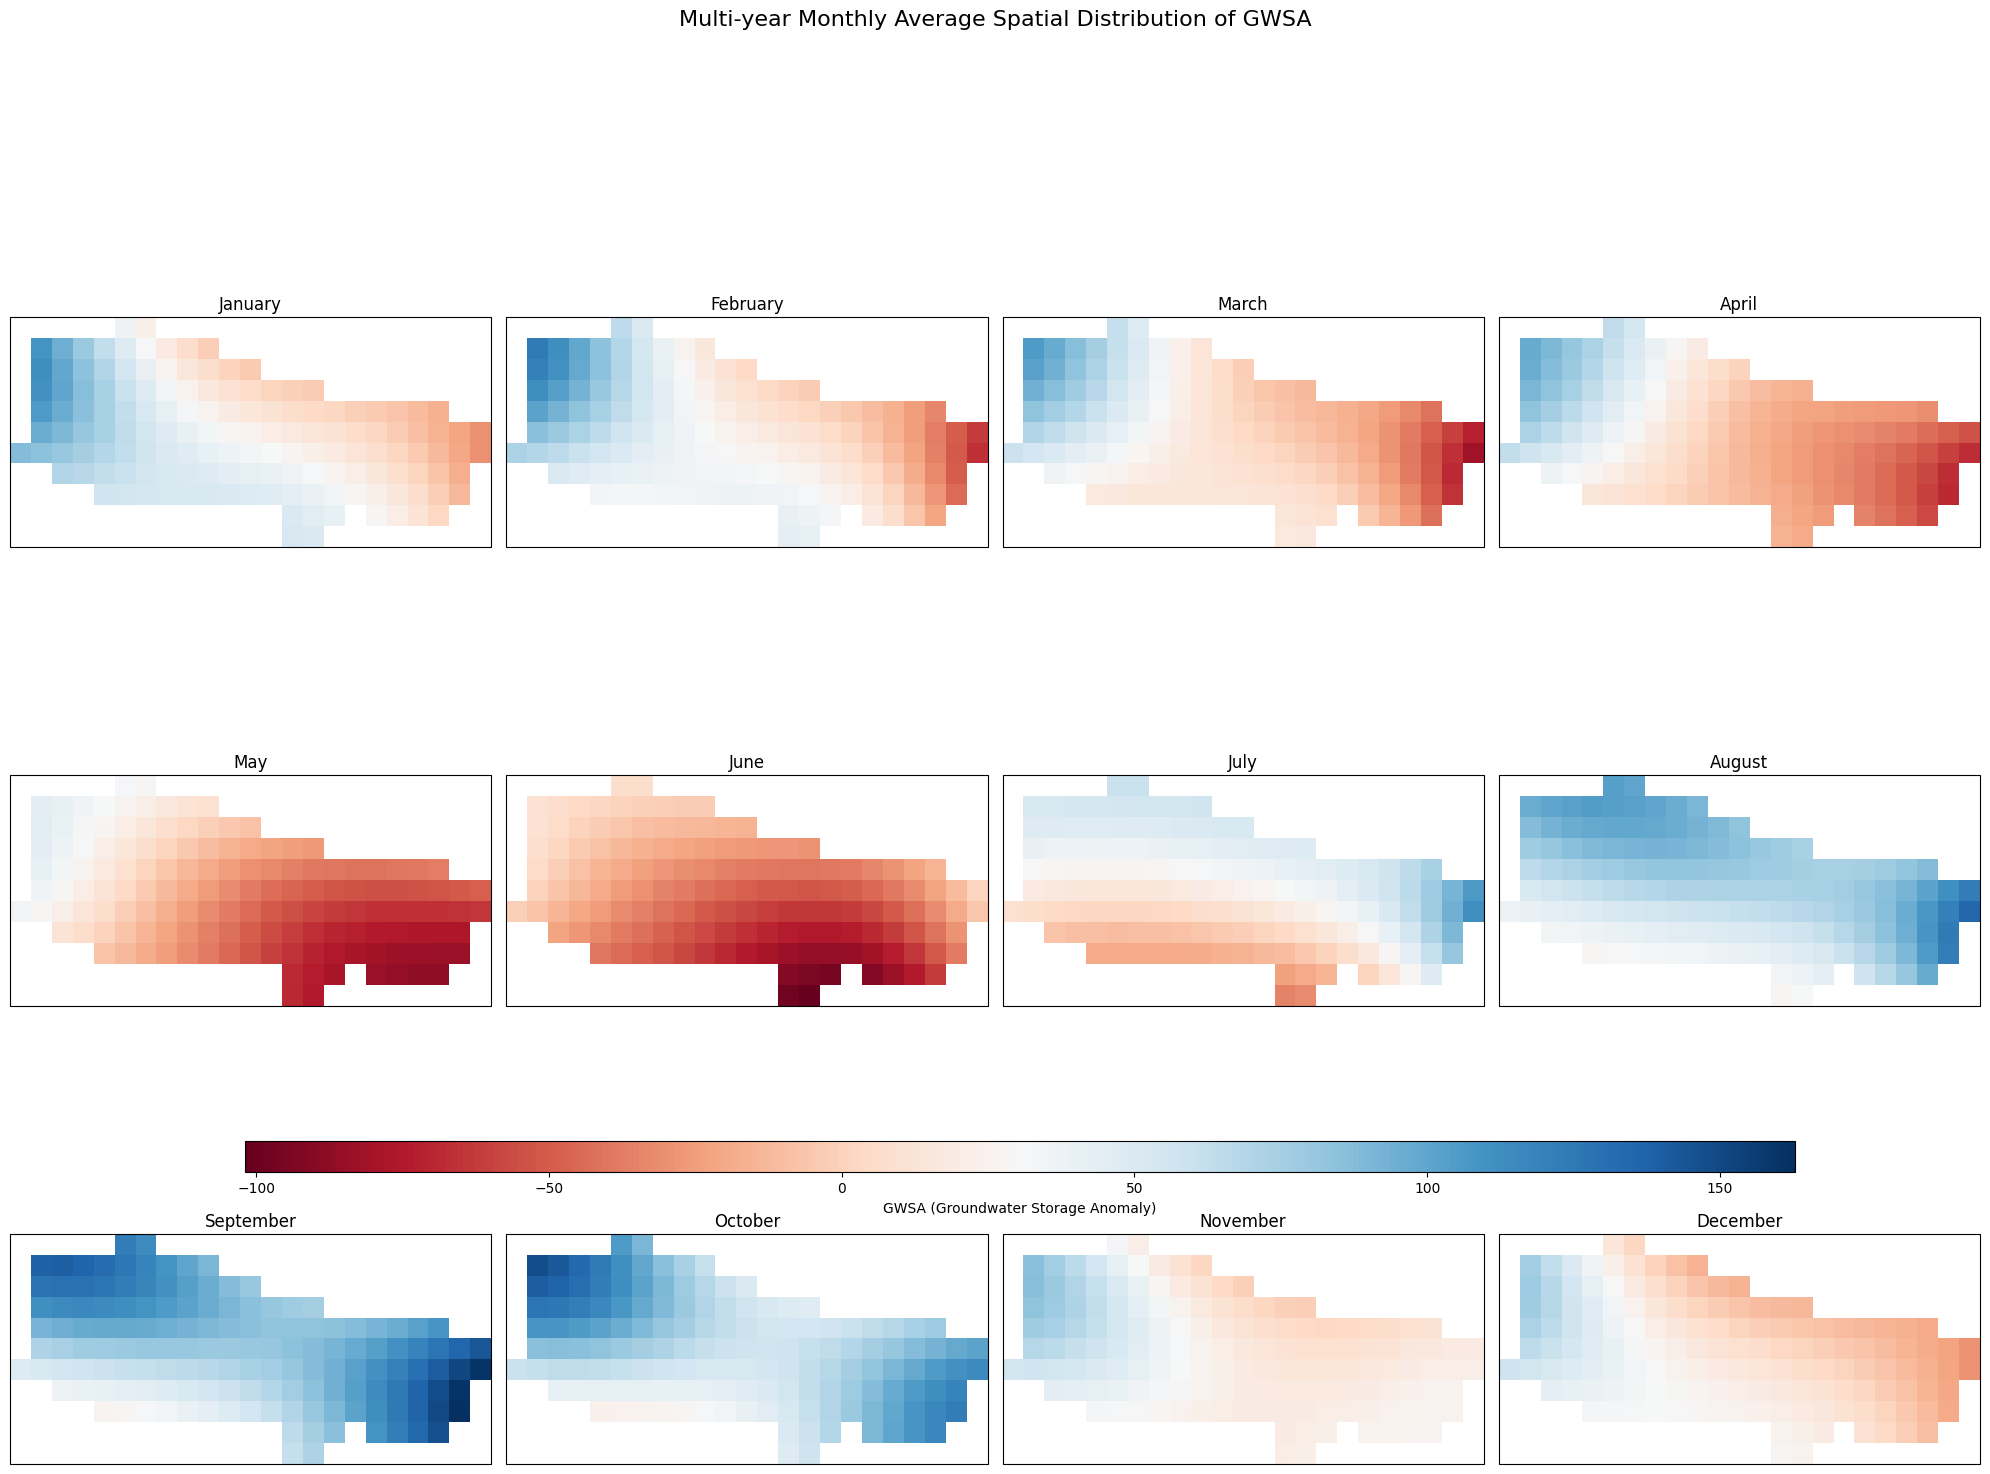

In [ ]:
gwsa = GWSA['GWSA']

# Group by month and calculate the mean over all years
monthly_avg = gwsa.groupby('time.month').mean('time')

# Determine the global min and max for consistent color scaling
vmin = float(monthly_avg.min())
vmax = float(monthly_avg.max())

# Define month names for plot titles
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a 3x4 grid of subplots with a PlateCarree projection
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each month's average GWSA
for i, month in enumerate(range(1, 13)):
    ax = axes[i // 4, i % 4]
    data = monthly_avg.sel(month=month)
    pcm = data.plot.pcolormesh(ax=ax, x='x', y='y', transform=ccrs.PlateCarree(),
                               cmap='RdBu', vmin=vmin, vmax=vmax, add_colorbar=False)
    ax.coastlines()
    ax.set_title(month_names[month - 1])
    ax.set_xlabel('Longitude') # Add Longitude label
    ax.set_ylabel('Latitude')  # Add Latitude label


# Add a shared colorbar
cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('GWSA (Groundwater Storage Anomaly)')

# Add a super title for the entire figure
fig.suptitle('Multi-year Monthly Average Spatial Distribution of GWSA', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Paperwork/RESULTS/Multiyear Monthly Average Spatial Distribution.jpg', dpi=300, bbox_inches='tight') # Save the figure
# Show the plot
plt.show()

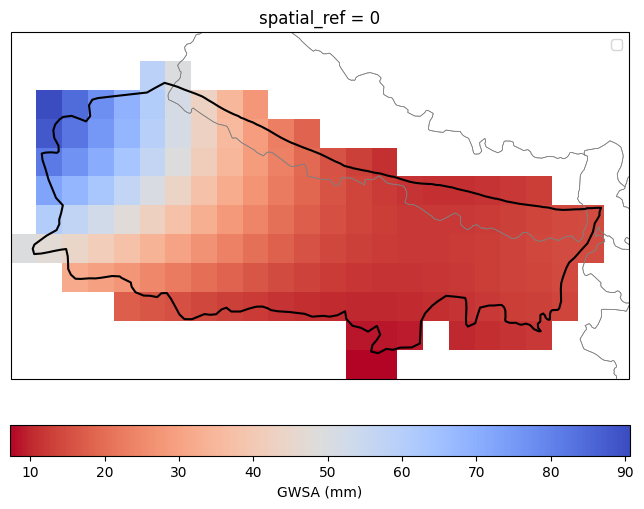

In [ ]:
# Compute the average groundwater anomaly over the entire time period
groundwater_avg = GWSA['GWSA'].mean(dim='time')

# Get min and max values for color scale
vmin = groundwater_avg.min().item()
vmax = groundwater_avg.max().item()

# Load the Nepal shapefile (basin boundary)
nepal_shp = nepal_shp.to_crs("EPSG:4326")  # Convert to WGS84 if needed

# Plot the groundwater anomaly
fig = plt.figure(figsize=(8, 6))
# Create a GeoAxes object using cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Use PlateCarree projection


c = groundwater_avg.plot(ax=ax, cmap='coolwarm_r', vmin=vmin, vmax=vmax, add_colorbar=True,x='x',y='y',
                        transform=ccrs.PlateCarree(),cbar_kwargs={'label':'GWSA (mm)', 'orientation': 'horizontal', 'pad': 0.1})  # Specify transform

# Plot the world administrative boundaries
world_shp.plot(ax=ax, edgecolor='gray', facecolor='None', linewidth=0.5)

# Plot the Nepal shapefile on top to highlight it
nepal_shp.plot(ax=ax, edgecolor='black', facecolor='None', linewidth=1.5)

# Set plot limits to focus on Nepal
ax.set_xlim([77, 89])  # Approximate longitude range for Nepal
ax.set_ylim([24, 30])  # Approximate latitude range for Nepal

#ax.set_title('Basin average GWSA (2003-2016)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
output_path = '/content/drive/MyDrive/Paperwork/RESULTS/Average GWSA.png'  # Replace with your desired path and filename
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()